为 新月形 数据集训练并微调一棵决策树。

a. 使用make_moons(n_samples=10000，noise=0.4)生成一个 新月形 数据集。

b. 使用train_test_split()拆分训练集和测试集。

c. 使用交叉验证的网格搜索（在GridSearchCV类的帮助下）为Decision-TreeClassifier找到适合的超参数值。提示：尝试max_leaf_nodes的多种值。

d. 使用超参数对整个训练集进行训练，并测量模型在测试集上的性能。你应该得到约85%～87%的准确率。

In [1]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4)
X

array([[-0.46005629,  0.02800811],
       [ 1.51848176, -0.8549387 ],
       [ 2.22367276,  0.07355617],
       ...,
       [ 1.48637472, -0.25293942],
       [ 0.72858684, -0.40793645],
       [ 1.23781816, -0.77819088]])

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape[0],y_test.shape[0]

(8000, 2000)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_leaf_nodes': [3, 5, 10, 20, 50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'max_depth': [None, 3, 5, 10, 20]
}

train_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(train_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters:  {'max_depth': None, 'max_leaf_nodes': 5, 'min_samples_split': 2}
Best accuracy: 0.8563750000000001


In [7]:
from sklearn.metrics import r2_score

best_tree = grid_search.best_estimator_
best_tree.fit(X_train, y_train)

y_pred = best_tree.predict(X_test)
print("r2 score: ",r2_score(y_test, y_pred))

r2 score:  0.4319721666361651


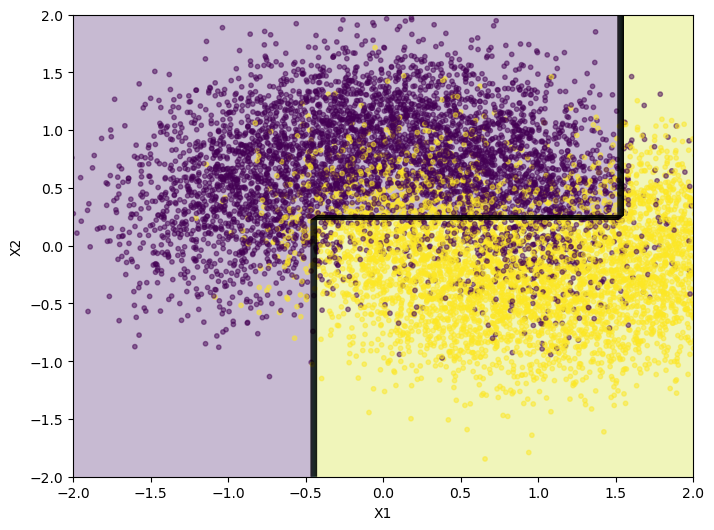

In [15]:
from matplotlib import pyplot as plt
import numpy as np

# 可视化决策边界
def plot_decision_boundary(model, X, y, axes=[-2, 2, -2, 2], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = model.predict(X_new).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, alpha=0.3)
    if contour:
        plt.contour(x1, x2, y_pred, colors='k', linewidths=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=10, alpha=alpha)
    plt.axis(axes)
 
plt.figure(figsize=(8, 6))
plot_decision_boundary(best_tree, X, y)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()